# 1. Image Processing and Enhancement

### Read & Display Image

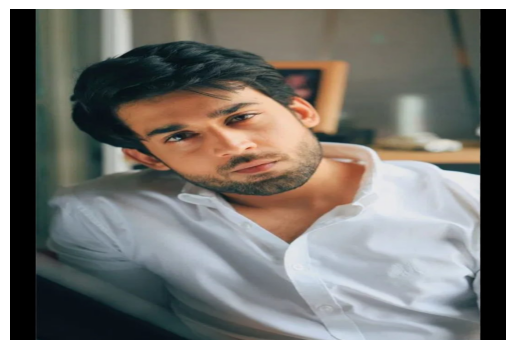

In [11]:
import cv2
from matplotlib import pyplot as plt

image_path = r'C:\opencv\image.jpeg'   # r lagana zaroori hai

image = cv2.imread(image_path)

if image is None:
    print("Image not found ❌ Check file path")
else:
    resized_image = cv2.resize(image, (1200, 800))
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    plt.imshow(resized_image_rgb)
    plt.axis("off")
    plt.show()


### Gaussian Blured image 

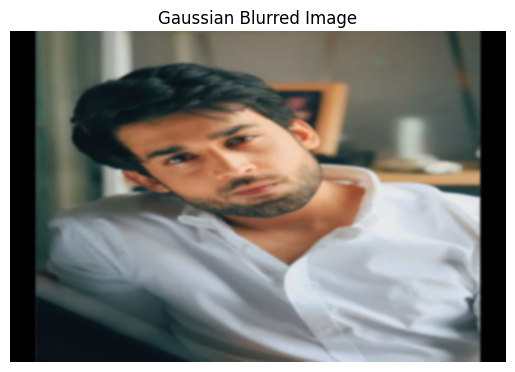

In [12]:
Gaussian = cv2.GaussianBlur(resized_image, (15, 15), 0)  
Gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)  
plt.imshow(Gaussian_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

### Convert to Grayscale

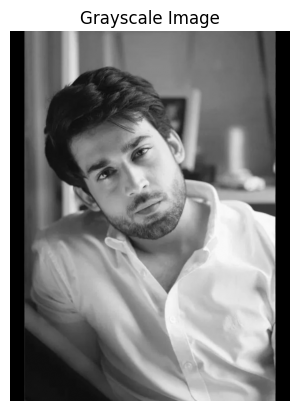

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

### Resize Image

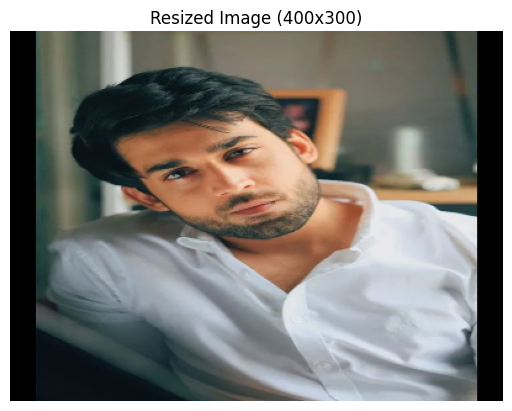

In [11]:
resized = cv2.resize(image, (400, 300))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (400x300)")
plt.axis("off")
plt.show()

### Rotate Image

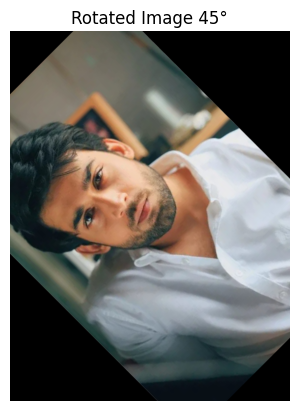

In [12]:
height, width = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rotated = cv2.warpAffine(image, rotation_matrix, (width, height))

plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image 45°")
plt.axis("off")
plt.show()

### Blur Image

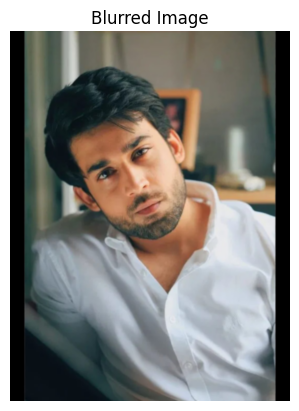

In [13]:
blurred = cv2.GaussianBlur(image, (7,7), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.axis("off")
plt.show()

### Edge Detection

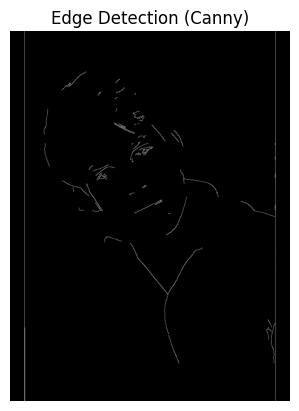

In [14]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection (Canny)")
plt.axis("off")
plt.show()

### Draw Shapes

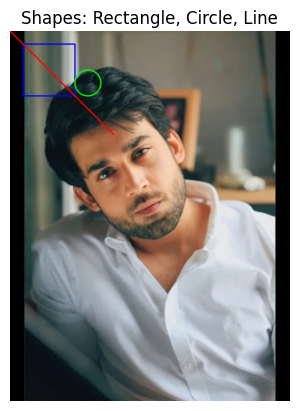

In [16]:
shapes_img = image.copy()
cv2.rectangle(shapes_img, (50,50), (250,250), (255,0,0), 3)
cv2.circle(shapes_img, (300,200), 50, (0,255,0), 3)
cv2.line(shapes_img, (0,0), (400,400), (0,0,255), 3)

plt.imshow(cv2.cvtColor(shapes_img, cv2.COLOR_BGR2RGB))
plt.title("Shapes: Rectangle, Circle, Line")
plt.axis("off")
plt.show()

### Add Text

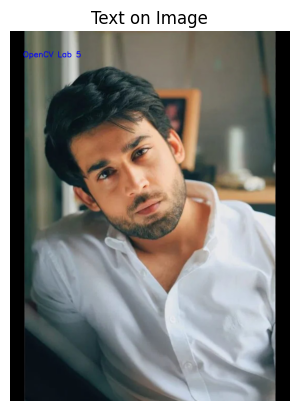

In [17]:
text_img = image.copy()
cv2.putText(text_img, "OpenCV Lab 5", (50,100),
            cv2.FONT_HERSHEY_SIMPLEX,
            1, (255,0,0), 2)

plt.imshow(cv2.cvtColor(text_img, cv2.COLOR_BGR2RGB))
plt.title("Text on Image")
plt.axis("off")
plt.show()

### Image Pyramid

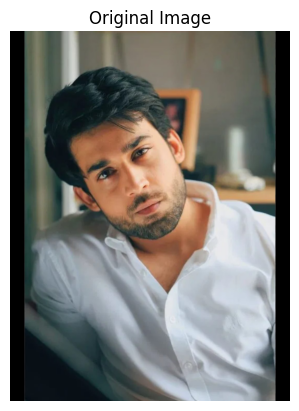

In [19]:
import cv2
import matplotlib.pyplot as plt

# ===== User Image Path =====
image_path = r'C:\opencv\image.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError("Image not found. Check path!")

# ===== Function to Display Image =====
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()
    
show_image(image, "Original Image")

Gaussian Pyramid (Downsampling)

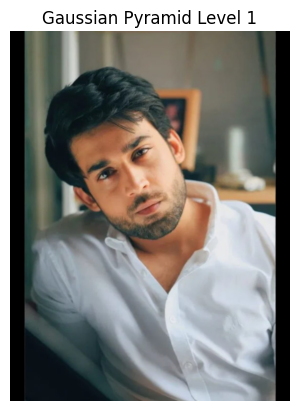

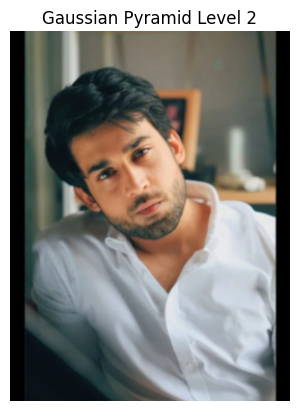

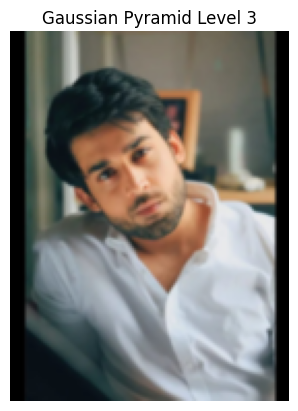

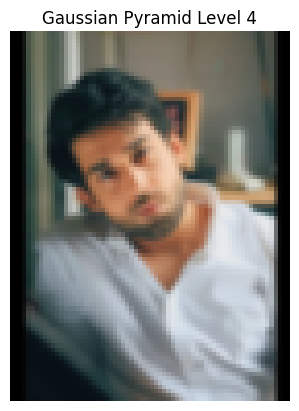

In [20]:
# Number of levels
num_levels = 4
current_image = image.copy()

for i in range(num_levels):
    current_image = cv2.pyrDown(current_image)   # downscale by factor of 2
    show_image(current_image, f"Gaussian Pyramid Level {i+1}")

Laplacian Pyramid (Edge / Detail Enhancement)

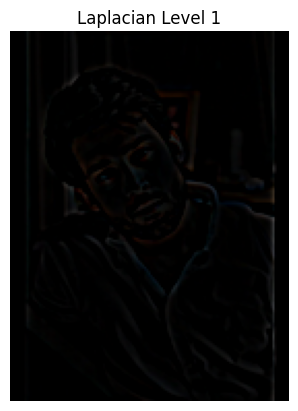

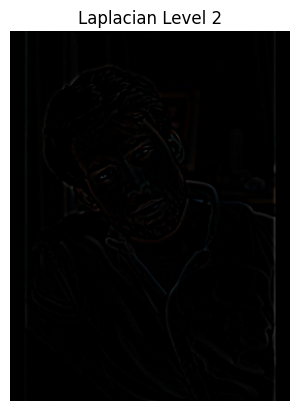

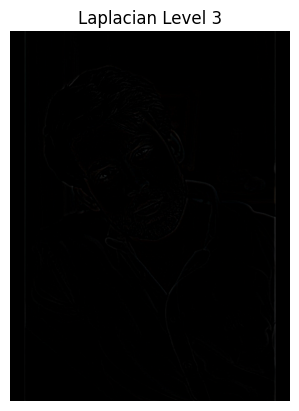

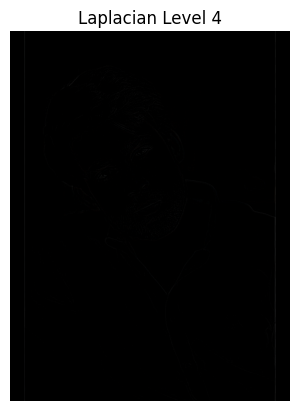

In [21]:
# First generate Gaussian Pyramid
gp = [image.copy()]
for i in range(num_levels):
    gp.append(cv2.pyrDown(gp[i]))

# Laplacian Pyramid (difference between levels)
lp = []
for i in range(num_levels, 0, -1):
    size = (gp[i-1].shape[1], gp[i-1].shape[0])
    GE = cv2.pyrUp(gp[i], dstsize=size)
    L = cv2.subtract(gp[i-1], GE)
    lp.append(L)

# Display Laplacian images
for idx, l in enumerate(lp):
    show_image(l, f"Laplacian Level {idx+1}")

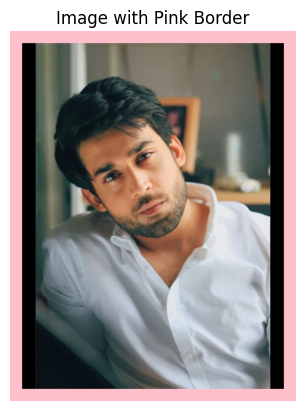

In [22]:
# Border size
top, bottom, left, right = 50, 50, 50, 50

# Pink color in BGR (OpenCV uses BGR, not RGB)
pink_color = [203, 192, 255]  # Approx RGB(255,192,203) → BGR

pink_bordered = cv2.copyMakeBorder(
    image, top, bottom, left, right,
    borderType=cv2.BORDER_CONSTANT,
    value=pink_color
)

show_image(pink_bordered, "Image with Pink Border")

# Image Segmentation & Thresholding

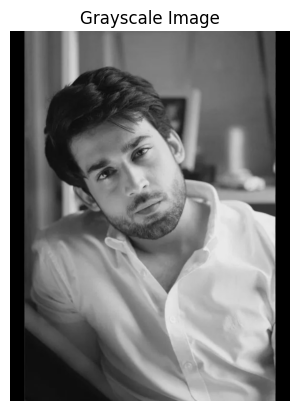

In [23]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray, "Grayscale Image")

### Simple Thresholding

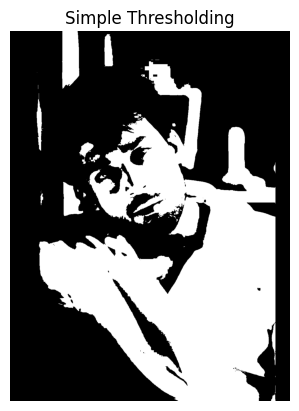

In [24]:
# Simple binary threshold
# cv2.threshold(src, thresh_value, max_value, type)
thresh_val = 127
max_val = 255
ret, simple_thresh = cv2.threshold(gray, thresh_val, max_val, cv2.THRESH_BINARY)

show_image(simple_thresh, "Simple Thresholding")

### Adaptive Thresholding

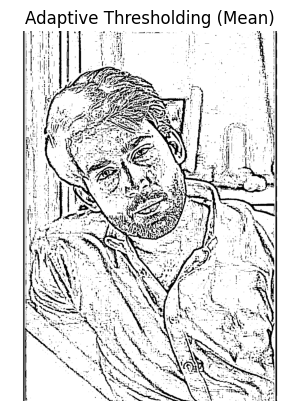

In [ ]:

adaptive_thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
    cv2.THRESH_BINARY, 11, 2
)

show_image(adaptive_thresh, "Adaptive Thresholding (Mean)")

### Otsu Thresholding

Otsu Threshold Value: 109.0


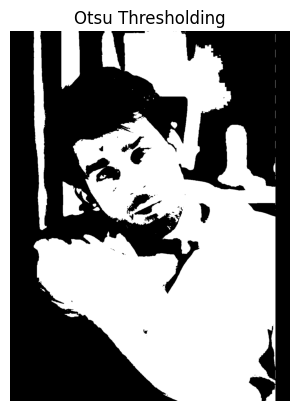

In [26]:

ret2, otsu_thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print(f"Otsu Threshold Value: {ret2}")
show_image(otsu_thresh, "Otsu Thresholding")

### Morphological Operations (Segmentation Refinement)

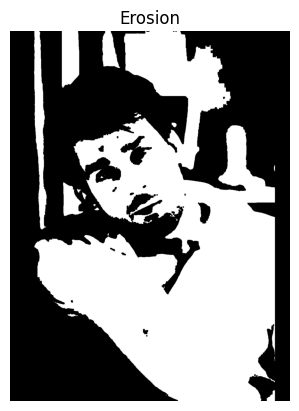

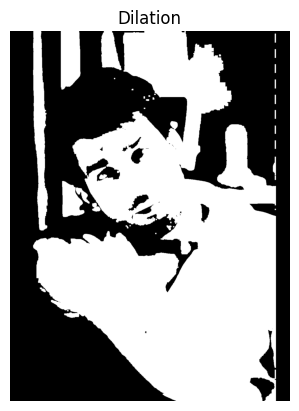

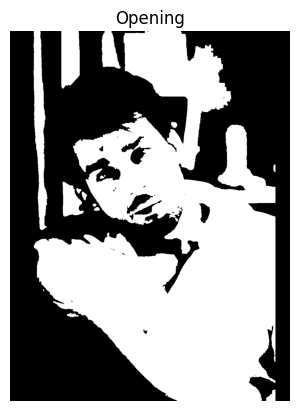

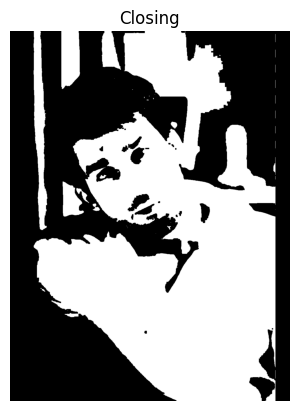

In [27]:

kernel = np.ones((5,5), np.uint8)

# Erosion: removes small white noise
erosion = cv2.erode(otsu_thresh, kernel, iterations=1)
show_image(erosion, "Erosion")

# Dilation: increases object area
dilation = cv2.dilate(otsu_thresh, kernel, iterations=1)
show_image(dilation, "Dilation")

# Opening: erosion followed by dilation (removes noise)
opening = cv2.morphologyEx(otsu_thresh, cv2.MORPH_OPEN, kernel)
show_image(opening, "Opening")

# Closing: dilation followed by erosion (closes small holes)
closing = cv2.morphologyEx(otsu_thresh, cv2.MORPH_CLOSE, kernel)
show_image(closing, "Closing")

# Morphological Operations & Filtering

### Erosion & Dilation

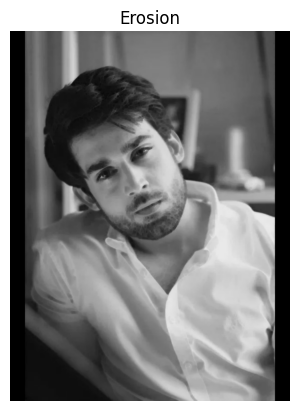

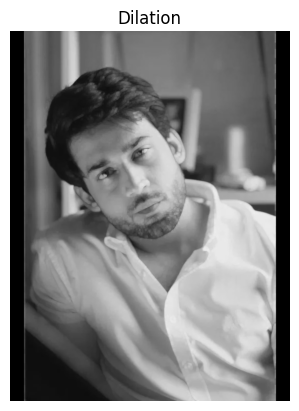

In [28]:
# Kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Erosion (shrinks objects)
erosion = cv2.erode(gray, kernel, iterations=1)
show_image(erosion, "Erosion")

# Dilation (expands objects)
dilation = cv2.dilate(gray, kernel, iterations=1)
show_image(dilation, "Dilation")

### Opening & Closing

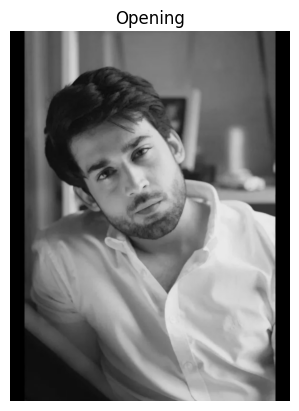

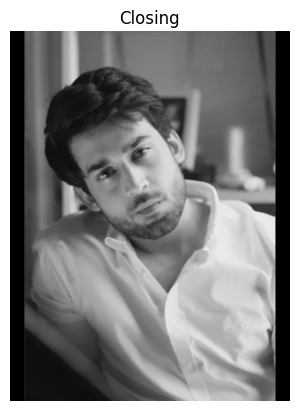

In [29]:
# Opening: Erosion followed by Dilation (removes noise)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
show_image(opening, "Opening")

# Closing: Dilation followed by Erosion (fills small holes)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
show_image(closing, "Closing")

### Morphological Gradient

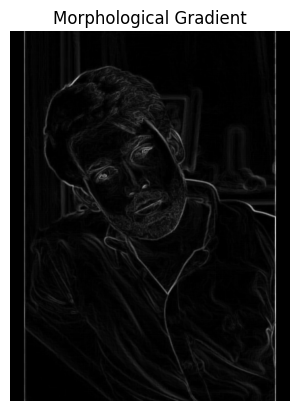

In [31]:
# Gradient: difference between dilation and erosion
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
show_image(gradient, "Morphological Gradient")

### Bilateral Filtering (Edge-Preserving Smoothing)

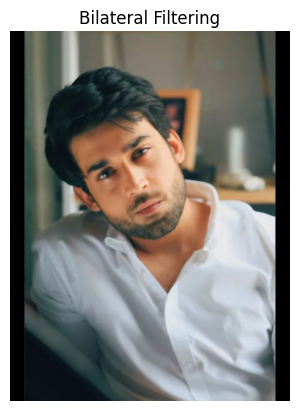

In [32]:
# Bilateral Filter preserves edges while smoothing
bilateral = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
show_image(bilateral, "Bilateral Filtering")

### Filter Specific Color 

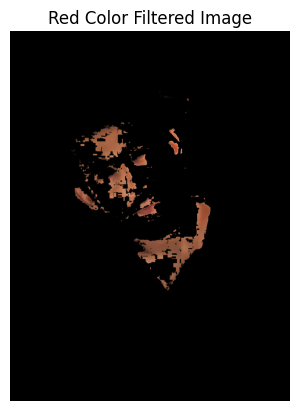

In [33]:
# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Red color range
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red2 = np.array([170,120,70])
upper_red2 = np.array([180,255,255])
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask = mask1 + mask2
red_only = cv2.bitwise_and(image, image, mask=mask)

show_image(red_only, "Red Color Filtered Image")

# Feature Detection and Description

### Line Detection (Hough Lines)

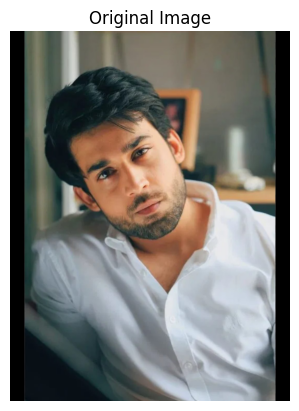

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ===== Image Path =====
image_path = r'C:\opencv\image.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError("Image not found. Check path!")

def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

show_image(image, "Original Image")

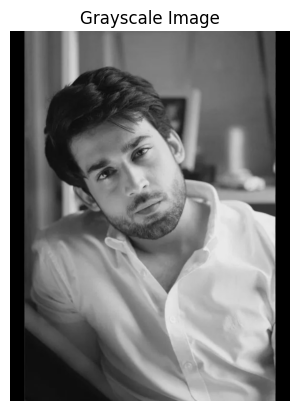

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray, "Grayscale Image")

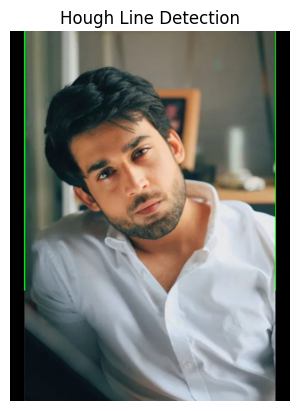

In [7]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

line_img = image.copy()
if lines is not None:
    for rho,theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(line_img, (x1,y1), (x2,y2), (0,255,0), 2)

show_image(line_img, "Hough Line Detection")

### Circle Detection (Hough Circles)

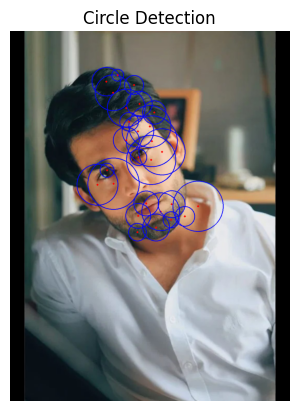

In [8]:
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
    param1=100, param2=30, minRadius=0, maxRadius=100
)

circle_img = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (255,0,0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0,0,255), 3)

show_image(circle_img, "Circle Detection")

### Shi-Tomasi Corner Detection

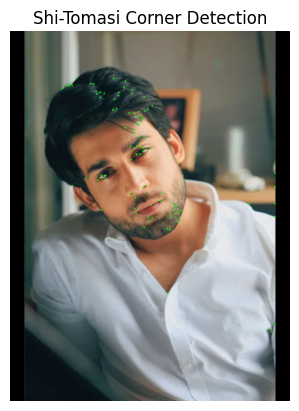

In [11]:
# Detect corners using Shi-Tomasi method
shi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Fix for NumPy version: convert to integer coordinates
shi_corners = shi_corners.astype(int)  # instead of np.int0

# Draw corners on the image
shi_img = image.copy()
for i in shi_corners:
    x, y = i.ravel()
    cv2.circle(shi_img, (x, y), 3, (0, 255, 0), -1)

# Display result
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")
plt.show()

### Smile Detection (Haar Cascade)

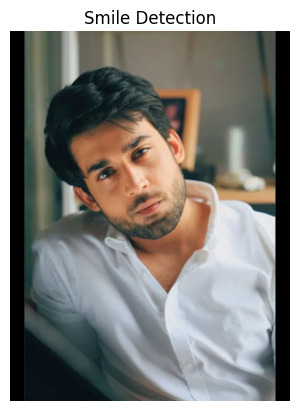

In [12]:
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")
faces_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

smile_img = image.copy()
gray_face = cv2.cvtColor(smile_img, cv2.COLOR_BGR2GRAY)
faces = faces_cascade.detectMultiScale(gray_face, 1.3, 5)

for (x,y,w,h) in faces:
    roi_gray = gray_face[y:y+h, x:x+w]
    roi_color = smile_img[y:y+h, x:x+w]
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw, sy+sh), (0,255,0), 2)

show_image(smile_img, "Smile Detection")

### Feature Extraction (ORB)

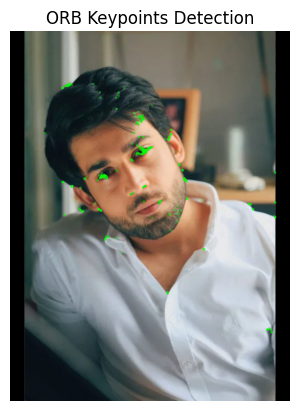

Number of keypoints detected: 500


In [13]:
orb = cv2.ORB_create()
kp, des = orb.detectAndCompute(gray, None)
orb_img = cv2.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)

show_image(orb_img, "ORB Keypoints Detection")
print(f"Number of keypoints detected: {len(kp)}")

# Feature Detection & Analysis

### Find Contours & Coordinates

Contour 1 coordinates:
[[1021 1400]
 [1021 1402]
 [1020 1403]
 [1020 1404]
 [1019 1405]
 [1017 1405]
 [1017 1407]
 [1016 1408]
 [1015 1407]
 [1015 1405]
 [1014 1405]
 [1014 1407]
 [1013 1408]
 [1013 1409]
 [1012 1410]
 [1012 1415]
 [1011 1416]
 [1011 1419]
 [1009 1421]
 [1008 1421]
 [1008 1422]
 [1007 1423]
 [1007 1427]
 [1023 1427]
 [1023 1422]
 [1022 1421]
 [1022 1404]
 [1021 1403]]

Contour 2 coordinates:
[[1023 1368]
 [1023 1393]
 [1022 1394]
 [1022 1397]
 [1023 1397]]

Contour 3 coordinates:
[[1023 1331]
 [1023 1335]]

Contour 4 coordinates:
[[ 905 1319]
 [ 904 1320]
 [ 905 1319]
 [ 907 1319]]

Contour 5 coordinates:
[[ 904 1315]
 [ 904 1316]
 [ 906 1316]
 [ 906 1315]]

Contour 6 coordinates:
[[ 187 1051]
 [ 189 1053]
 [ 190 1053]
 [ 191 1052]
 [ 192 1053]
 [ 192 1054]
 [ 195 1054]
 [ 196 1055]
 [ 199 1055]
 [ 200 1056]
 [ 201 1056]
 [ 202 1055]
 [ 201 1055]
 [ 200 1056]
 [ 199 1055]
 [ 199 1054]
 [ 195 1054]
 [ 194 1053]
 [ 192 1053]
 [ 191 1052]
 [ 190 1052]
 [ 189 1051]]

Conto

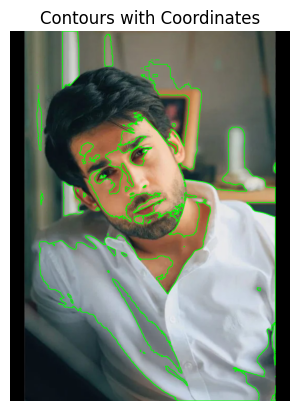

In [14]:
# Threshold the image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and print coordinates
contour_img = image.copy()
for i, cnt in enumerate(contours):
    cv2.drawContours(contour_img, [cnt], 0, (0,255,0), 2)
    print(f"Contour {i+1} coordinates:\n{cnt.reshape(-1,2)}\n")  # flatten points for readability

show_image(contour_img, "Contours with Coordinates")

### Histogram Analysis

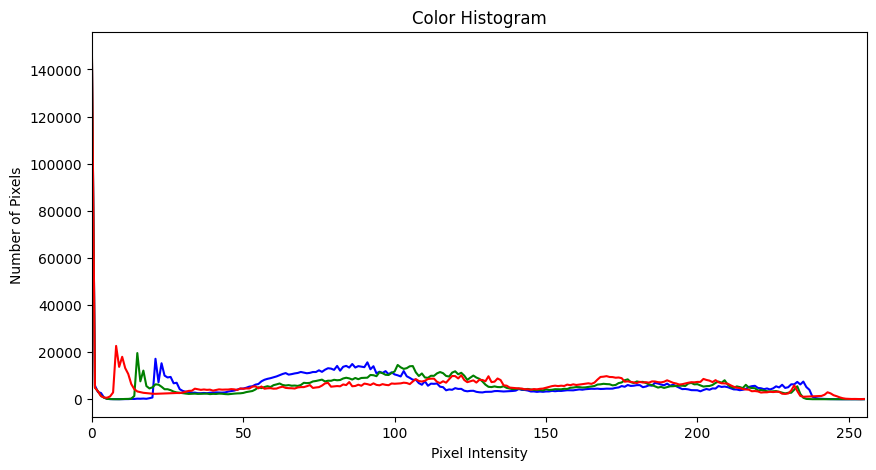

In [15]:
# Calculate histogram for each channel (B,G,R)
colors = ('b','g','r')
plt.figure(figsize=(10,5))

for i, col in enumerate(colors):
    hist = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
    
plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.show()

### Grayscale Histogram

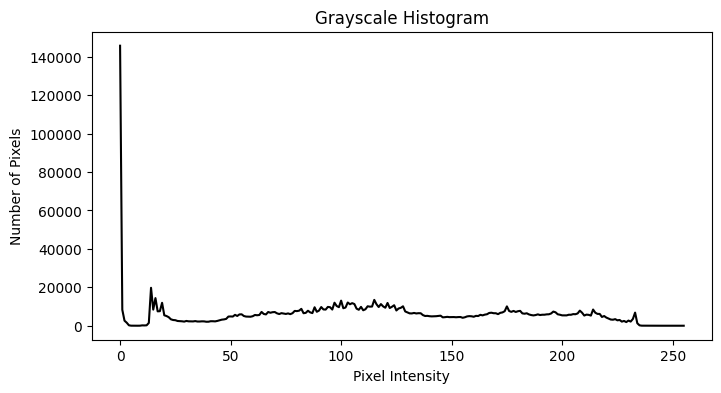

In [16]:
gray_hist = cv2.calcHist([gray],[0],None,[256],[0,256])

plt.figure(figsize=(8,4))
plt.plot(gray_hist, color='k')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.show()